In [52]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import sklearn as sk
import numpy as np

In [20]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

print("Train_ x", train_x.shape)
print("Train_ y", train_y.shape)
print("Test_ x", test_x.shape)
print("Test_ y", test_y.shape)

Train_ x (60000, 28, 28)
Train_ y (60000,)
Test_ x (10000, 28, 28)
Test_ y (10000,)


5
0
4
1
9


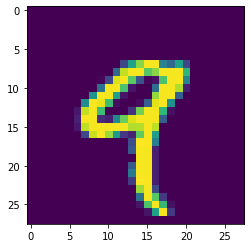

In [21]:
for i in range(0,5):
    plt.imshow(train_x[i])
    print(train_y[i])

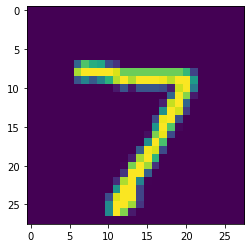

In [22]:
plt.imshow(test_x[0])

In [45]:
# Reshape the data to add the grayscale dimension
img_rows=train_x[0].shape[0]
img_cols=train_x[0].shape[1]

train_x=train_x.reshape(train_x.shape[0],img_rows,img_cols,1)

test_x=test_x.reshape(test_x.shape[0],img_rows,img_cols,1)

input_shape = (28,28,1)

In [121]:
# Simple model for a baseline
model = keras.Sequential(name="baseline_mnist")
model.add(keras.layers.Conv2D(10, kernel_size=(5, 5), activation="relu", name="conv1", padding='valid', strides=(1,1), input_shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(20, kernel_size=(3, 3), padding='same', activation="relu", name="conv2"))
model.add(keras.layers.MaxPooling2D(pool_size=(3,3), strides=(1, 1), padding='valid', name='pool1'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='softmax', name="output"))

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [122]:
model.fit(train_x, train_y, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 7.8338 - accuracy: 0.8758
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0738 - accuracy: 0.9792
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0623 - accuracy: 0.9827
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0732 - accuracy: 0.9799
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0659 - accuracy: 0.9829
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0630 - accuracy: 0.9835
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0580 - accuracy: 0.9852
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0544 - accuracy: 0.9866
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0434 - accuracy: 0.9893
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.

In [69]:
model.summary()

Model: "my_sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 24, 24, 10)        260       
_________________________________________________________________
conv2 (Conv2D)               (None, 24, 24, 20)        1820      
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 22, 22, 20)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 9680)              0         
_________________________________________________________________
output (Dense)               (None, 10)                96810     
Total params: 98,890
Trainable params: 98,890
Non-trainable params: 0
_________________________________________________________________


In [110]:
output = model.predict(test_x)
predictions = []
test_predictions = []

Here, I manually calculate the test set accuracy. Later, I just use the model.evaluate() method which does this automatically

In [111]:
# Create list of tuples containing the highest value class and the probability 
for i, out in enumerate(output):
    predictions.append((np.argmax(out), np.max(out)))
    test_predictions.append(np.argmax(out))

In [112]:
for i in range(5):
    print(predictions[i])

(7, 0.9999999)
(2, 1.0)
(1, 0.99999404)
(0, 1.0)
(4, 1.0)


In [113]:
print(test_y[:5])
print(test_predictions[:5])

[7 2 1 0 4]
[7, 2, 1, 0, 4]


In [118]:
# Calculate accuracy
num_correct = 0
for i, true in enumerate(test_y):
    if true == test_predictions[i]:
        num_correct += 1
test_accuracy = num_correct / len(test_y)

In [119]:
print(test_accuracy)

0.9814


In [128]:
# This does what I just did, whoops
model.evaluate(test_x, test_y)

313/313 [==============================] - 0s 1ms/step - loss: 0.1069 - accuracy: 0.9802


[0.106863833963871, 0.9801999926567078]

In [127]:
model.save(filepath='models/baseline_model')

INFO:tensorflow:Assets written to: models/baseline_model/assets
